In [1]:
import pandas as pd
from numpy.linalg import eig
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
# from bioinfokit.analys import stat

In [3]:
survey = pd.read_csv('original_data/survey.csv')
cols = survey.columns

C:\Users\Eren\AppData\Local\Temp/ipykernel_10732/2755391667.py:1: DtypeWarning: Columns (314,391,392,789,791,792,1124,1125,1227,1228,1231,1232,1477,1478,1554,1555,1556,1557,1558,1559,1561,1568,1571,1678,1687,1745,1746,1818,1836,1837,1843,1844,1849,1851,1852,1853,2072,2116,2117,2264,2266,2280,2281,2282,2283,2289,2290,2483,2484,2501,2502,2508,2509,2699,2711,2712,2830) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv('original_data/survey.csv')


In [8]:
for wave in range(1, 9):
    added_cols = ['egoid']
    for col in cols:
        if col.endswith(f'_{wave}'):
            added_cols.append(col)
    
    survey[added_cols].to_csv('original_data/survey_partial/survey_wave_{}.csv'.format(wave), index=False)

In [9]:
personality_inventory = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']

added_cols = ['egoid']
for col in cols:
    for item in personality_inventory:
        if col.startswith(item):
            added_cols.append(col)

survey[added_cols].to_csv('original_data/survey_partial/survey_personality_inv.csv', index=False)

In [10]:
added_cols = ['egoid']

for col in cols:
    if col.startswith('BigFive'):
        added_cols.append(col)

survey[added_cols].to_csv('original_data/survey_partial/survey_bigfive.csv', index=False)

In [12]:
sleep_prefix = ['PSQI', 'MEQ']

added_cols = ['egoid']
for col in cols:
    for item in sleep_prefix:
        if col.startswith(item):
            added_cols.append(col)

survey[added_cols].to_csv('original_data/survey_partial/survey_sleep.csv', index=False)

In [13]:
sleep_prefix = ['STAI', 'BAI', 'Stress', 'BDI', 'CESD']

added_cols = ['egoid']
for col in cols:
    for item in sleep_prefix:
        if col.startswith(item):
            added_cols.append(col)

survey[added_cols].to_csv('original_data/survey_partial/survey_mental_health.csv', index=False)

In [14]:
sleep_prefix = ['Weight', 'Height', 'Dieting', 'PhysicalDisability']

added_cols = ['egoid']
for col in cols:
    for item in sleep_prefix:
        if col.startswith(item):
            added_cols.append(col)

survey[added_cols].to_csv('original_data/survey_partial/survey_health.csv', index=False)

In [15]:
sleep_prefix = ['hs', 'hsgrade', 'apcourses', 'apexams', 'degreeintent', 'major', 'ndfirst']

added_cols = ['egoid']
for col in cols:
    for item in sleep_prefix:
        if col.startswith(item):
            added_cols.append(col)

survey[added_cols].to_csv('original_data/survey_partial/survey_education.csv', index=False)

In [ ]:
sleep_prefix = ['relative,', 'parent', 'grandparent', 'sibling', 'uncle', 'cousin', 'otherrelative', 'mom', 'dad', 'madad', 'mamo', 'padad', 'pamo', 'yr', 'num', 'adopted', 'birth', 'youre']

added_cols = ['egoid']
for col in cols:
    for item in sleep_prefix:
        if col.startswith(item):
            added_cols.append(col)

survey[added_cols].to_csv('original_data/survey_partial/survey_origin.csv', index=False)

In [3]:
# PAGE 59
classification = {
    'health': ['Weight', 'Height', 'Dieting', 'PhysicalDisability', 'sex', 'gender', 'use',],
    'personality_inv': ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'],
    'bigfive': ['BigFive'],
    'sleep': ['PSQI', 'MEQ'],
    'mental_health': ['STAI', 'BAI', 'Stress', 'BDI', 'CESD'],
    'education': ['hs', 'hssex', 'hsgrade', 'apcourses', 'apexams', 'degreeintent', 'major', 'ndfirst', 'hrswork'],
    'origin': ['gender', 'relative,', 'parent', 'grandparent', 'sibling', 'uncle', 'cousin', 'otherrelative', 'mom', 'dad', 'madad', 'mamo', 'padad', 'pamo', 'yr', 'num', 'adopted', 'birth', 'youre'],
    'personal': ['SelfEsteem', 'Trust', 'SelfReg', 'SRQE', 'lonely', 'selsa', 'SelfEff', 'SelfReg', 'selfreg'],
    'bad_habits': ['use'],
    'exercise': ['exercise', 'clubsports', 'varsitysports', 'swimming'],
    'sex': ['sex'] 
}

for _class, prefixes in classification.items(): 
    for wave in range(1, 9):
        added_cols = ['egoid']
        
        for col in cols:
            if col.endswith(f'_{wave}'):
                for item in prefixes:
                    if col.startswith(item):
                        added_cols.append(col)
                        break
        
        survey[added_cols].to_csv('original_data/survey_partial_2/survey_{}_{}.csv'.format(_class, wave), index=False)

In [2]:
# PAGE 59
classification = {
    'health': ['Weight', 'Height', 'Dieting', 'PhysicalDisability'],
    'personality_inv': ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'],
    'bigfive': ['BigFive'],
    'sleep': ['PSQI', 'MEQ'],
    'mental_health': ['STAI', 'BAI', 'Stress', 'BDI', 'CESD'],
    'education': ['hs', 'hssex', 'hsgrade', 'apcourses', 'apexams', 'degreeintent', 'major', 'ndfirst', 'hrswork'],
    'origin': ['gender', 'relative,', 'parent', 'grandparent', 'sibling', 'uncle', 'cousin', 'otherrelative', 'mom', 'dad', 'madad', 'mamo', 'padad', 'pamo', 'yr', 'num', 'adopted', 'birth', 'youre'],
    'personal': ['SelfEsteem', 'Trust', 'SelfReg', 'SRQE', 'lonely', 'selsa', 'SelfEff', 'SelfReg', 'selfreg'],
    'bad_habits': ['use'],
    'exercise': ['exercise', 'clubsports', 'varsitysports', 'swimming'],
    'sex': ['sex'] 
}

imp_methods = ['knn_mod', 'knn', 'mean_mod', 'mean', 'median', 'mod']

for method in imp_methods:
    survey_m = pd.read_csv(f'original_data/survey_{method}.csv')
    cols = survey_m.columns

    for _class, prefixes in classification.items(): 
        for wave in range(1, 9):
            added_cols = ['egoid']
            
            for col in cols:
                if col.endswith(f'_{wave}'):
                    for item in prefixes:
                        if col.startswith(item):
                            added_cols.append(col)
                            break
            
            
            survey_m[added_cols].to_csv('original_data/survey_{}_partial/survey_{}_{}.csv'.format(method, _class, wave), index=False)

C:\Users\Eren\AppData\Local\Temp/ipykernel_6052/293654901.py:19: DtypeWarning: Columns (313,314,391,392,783,786,1117,1118,1213,1220,1221,1224,1366,1367,1465,1466,1467,1468,1543,1544,1545,1546,1547,1548,1550,1557,1559,1662,1669,1727,1728,1800,1801,1818,1819,1825,1826,1831,1833,1834,1835,2052,2096,2097,2244,2245,2260,2261,2262,2263,2269,2270,2463,2464,2481,2482,2488,2489,2679,2689,2690,2691,2692,2808,2809) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_m = pd.read_csv(f'original_data/survey_{method}.csv')
C:\Users\Eren\AppData\Local\Temp/ipykernel_6052/293654901.py:19: DtypeWarning: Columns (313,314,391,392,783,786,1117,1118,1213,1220,1221,1224,1366,1367,1465,1466,1467,1468,1543,1544,1545,1546,1547,1548,1550,1557,1559,1662,1669,1727,1728,1800,1801,1818,1819,1825,1826,1831,1833,1834,1835,2052,2096,2097,2244,2245,2260,2261,2262,2263,2269,2270,2463,2464,2481,2482,2488,2489,2679,2689,2690,2691,2692,2808,2809) have mixed types. Specify dtype option on impor

knn_mod_health_1
Index(['Weight_1', 'Height_1', 'Dieting_1', 'PhysicalDisability_1'], dtype='object')
      index              variable  value
0         0              Weight_1  132.5
1         1              Weight_1  135.0
2         2              Weight_1  138.0
3         3              Weight_1  126.0
4         4              Weight_1  150.0
...     ...                   ...    ...
2883    717  PhysicalDisability_1    0.0
2884    718  PhysicalDisability_1    0.0
2885    719  PhysicalDisability_1    0.0
2886    720  PhysicalDisability_1    0.0
2887    721  PhysicalDisability_1    0.0

[2888 rows x 3 columns]


C:\Users\Eren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Eren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 98.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


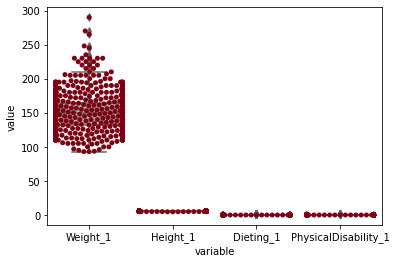

fvalue, pvalue
21922.733482364714 0.0


,sum_sq,df,F,PR(>F)
C(variable),1.201793e+07,3.0,21922.733482,0.0
Residual,5.269979e+05,2884.0,NaN,NaN


In [26]:
classification = {
    'health': ['Weight', 'Height', 'Dieting', 'PhysicalDisability'],
    'personality_inv': ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'],
    'bigfive': ['BigFive'],
    'sleep': ['PSQI', 'MEQ'],
    'mental_health': ['STAI', 'BAI', 'Stress', 'BDI', 'CESD'],
    'education': ['hs', 'hssex', 'hsgrade', 'apcourses', 'apexams', 'degreeintent', 'major', 'ndfirst', 'hrswork'],
    'origin': ['relative,', 'parent', 'grandparent', 'sibling', 'uncle', 'cousin', 'otherrelative', 'mom', 'dad', 'madad', 'mamo', 'padad', 'pamo', 'yr', 'num', 'adopted', 'birth', 'youre'],
    'personal': ['SelfEsteem', 'Trust', 'SelfReg', 'SRQE', 'lonely', 'selsa', 'SelfEff', 'SelfReg', 'selfreg'],
    'bad_habits': ['use'],
    'exercise': ['exercise', 'clubsports', 'varsitysports', 'swimming'],
    'sex': ['sex', 'gender'] 
}

dc = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neither Agree nor Disagree': 3,
    'Agree': 4,
    'Strongly Agree': 5,
    
    'no': 0,
    'yes': 1,
    
    'Almost never': 1,
    'Sometimes': 2,
    'Often': 3,
    'Almost always': 4,
}

imp_methods = ['knn_mod', 'knn', 'mean_mod', 'mean', 'median', 'mod']

for method in imp_methods:
    for _class, prefixes in classification.items(): 
        for wave in range(1, 9):
            survey_sub = pd.read_csv('original_data/survey_{}_partial/survey_{}_{}.csv'.format(method, _class, wave))
            survey_sub = survey_sub.drop('egoid', axis=1)
            
            print(f'{method}_{_class}_{wave}')
            print(survey_sub.columns)
            
            survey_sub['Dieting_1'] = survey_sub['Dieting_1'].map(dc, na_action='ignore')
            survey_sub['PhysicalDisability_1'] = survey_sub['PhysicalDisability_1'].map(dc, na_action='ignore')
            
            survey_sub_melt = pd.melt(survey_sub.reset_index(), id_vars=['index'], value_vars=survey_sub.columns)
            
            print(survey_sub_melt)

            ax = sns.boxplot(x='variable', y='value', data=survey_sub_melt, color='#99c2a2')
            ax = sns.swarmplot(x="variable", y="value", data=survey_sub_melt, color='#7d0013')
            plt.show()

            fvalue, pvalue = stats.f_oneway(survey_sub['Weight_1'], survey_sub['Height_1'], survey_sub['Dieting_1'], survey_sub['PhysicalDisability_1'])
            print('fvalue, pvalue')
            print(fvalue, pvalue)
            
            model = ols('value ~ C(variable)', data=survey_sub_melt).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            anova_table
            
            from bioinfokit.analys import stat
            res = stat()
            res.anova_stat(df=survey_sub_melt, res_var='value', anova_model='value ~ C(variable)')
            res.anova_summary

            break
        break
    break

anova_table